# In Depth 4 - Drawing multilayer-style

Here we show the fuctionalities and parameters of `xgi.draw_multilayer()`.

In [1]:
import matplotlib.pyplot as plt

import xgi

Les us first create a small toy hypergraph containing edges of different sizes.

In [2]:
H = xgi.fast_random_hypergraph(10, ps=[0.2, 0.05, 0.05], seed=1)

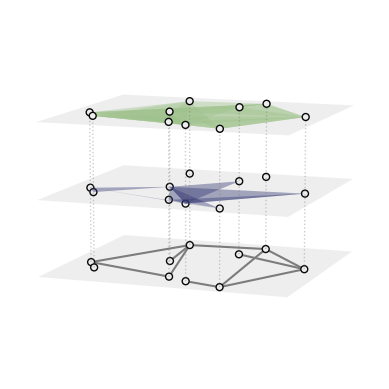

In [3]:
ax = plt.axes(projection="3d")
xgi.draw_multilayer(H, ax=ax)

plt.show()

## Basics

Notice that this function returns a tuple `(ax, collections)` where `collections` is a tuple `(node_collection, edge_collection)`. The collections can be used to plot colorbars as we will see later.

The color, linewidth, transparancy, and style of the hyperedges can all be customised, for example with single values:

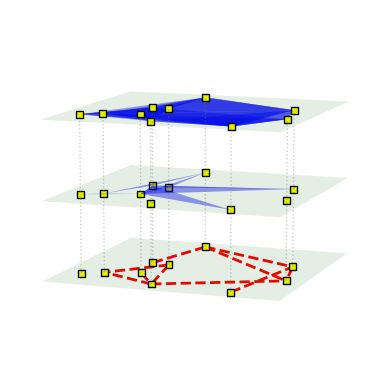

In [4]:
pos = xgi.barycenter_spring_layout(H, seed=1)

ax = plt.axes(projection="3d")
xgi.draw_multilayer(
    H,
    ax=ax,
    pos=pos,
    node_fc="yellow",
    node_shape="s",
    dyad_color="r",
    dyad_style="--",
    dyad_lw=2,
    edge_fc="b",
    layer_color="g",
)

plt.show()

Or with multiple values:

ValueError: The input color argument must be a single color or its length must match the number of plotted elements (10).

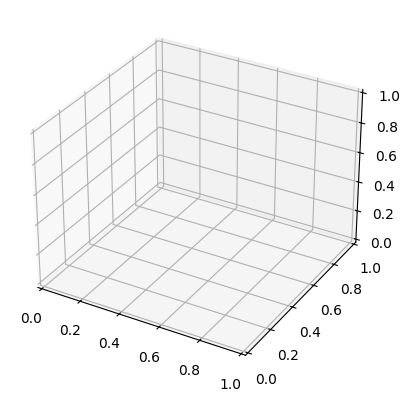

In [5]:
pos = xgi.barycenter_spring_layout(H, seed=1)

ax = plt.axes(projection="3d")
xgi.draw_multilayer(
    H,
    ax=ax,
    pos=pos,
    node_fc=["red"] + ["white"] * 9,
    dyad_color=["violet"] + ["k"] * 12,
    edge_fc="b",
    layer_color=["b", "g", "y"],
)

plt.show()

## Arrays of floats and colormaps

In XGI, you can easily color hyperedges according to an EdgeStat, or just an array or a dict with float values:

In [ ]:
pos = xgi.barycenter_spring_layout(H, seed=1)

ax = plt.axes(projection="3d")
ax, collections = xgi.draw_multilayer(
    H, ax=ax, pos=pos, edge_fc=H.edges.size, node_fc=H.nodes.degree
)

node_coll, edge_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_coll, label="edges")

By default, the colormaps used are "crest_r" and "Reds". These can be changed:

In [ ]:
pos = xgi.barycenter_spring_layout(H, seed=1)

ax = plt.axes(projection="3d")
ax, collections = xgi.draw_multilayer(
    H,
    ax=ax,
    pos=pos,
    edge_fc=H.edges.size,
    node_fc=H.nodes.degree,
    node_fc_cmap="Blues",
    edge_fc_cmap="viridis",
    alpha=0.3,
)

node_coll, edge_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_coll, label="edges")

You can even have a cmap for the layers instead:

In [ ]:
pos = xgi.barycenter_spring_layout(H, seed=1)

ax = plt.axes(projection="3d")
ax, collections = xgi.draw_multilayer(
    H, ax=ax, pos=pos, edge_fc="grey", layer_color=[2, 3, 4], layer_cmap="viridis"
)

node_coll, edge_coll = collections

plt.show()

## Styling of interlayer links

First you can simply remove them with `conn_lines=False`:

In [ ]:
pos = xgi.barycenter_spring_layout(H, seed=1)

ax = plt.axes(projection="3d")
ax, collections = xgi.draw_multilayer(H, ax=ax, pos=pos, conn_lines=False)

node_coll, edge_coll = collections

plt.show()

Or you can change their style with `conn_lines_style`:

In [ ]:
pos = xgi.barycenter_spring_layout(H, seed=1)

ax = plt.axes(projection="3d")
ax, collections = xgi.draw_multilayer(H, ax=ax, pos=pos, conn_lines_style="-.")

node_coll, edge_coll = collections

plt.show()

## Set the height between layers and the view angles

By default the height between layers is `sep=0.4`: 

In [ ]:
ax = plt.axes(projection="3d")
xgi.draw_multilayer(H, ax=ax, sep=0.4)

plt.show()

This can be changed!

In [ ]:
ax = plt.axes(projection="3d")
xgi.draw_multilayer(H, ax=ax, sep=0.1)

plt.show()

ax = plt.axes(projection="3d")
xgi.draw_multilayer(H, ax=ax, sep=1)

plt.show()

Similarly, the default view angles are `h_angle=10`, `v_angle=20`, but can be changed:

In [ ]:
ax = plt.axes(projection="3d")
xgi.draw_multilayer(H, ax=ax, h_angle=5, v_angle=50)

plt.show()

In [ ]:
ax = plt.axes(projection="3d")
xgi.draw_multilayer(H, ax=ax, h_angle=70, v_angle=10)

plt.show()

## Control axis size

You can control the size of the axis by passing a custom made `Axis3d` like so:

In [ ]:
_, ax = plt.subplots(figsize=(4, 4), subplot_kw={"projection": "3d"})
xgi.draw_multilayer(H, ax=ax)

plt.show()

In [16]:
plt.close(
    "all"
)  # closes existing ax3d to avoid bugs in next notebooks when running notebook tests